# Guided Project: Visualizing The Gender Gap In College Degrees
Lev Craig ([levcb](www.github.com/levcb))

This is the guided project for the *Storytelling through Data Visualization* Dataquest course. In this project, I analyze the gender gap in U.S. college degrees based on data compiled annually by [the Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp). This dataset (available [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv)) shows the percentages of bachelor's degrees granted to women between 1970 and 2012, divided into 17 degree categories based on field of study.

First, I'll set up my notebook (importing libraries, reading in the `.csv` file, defining degree categories, etc.).

In [1]:
# ensure plots display inline, import necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# read in csv file
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
# set colorblind-friendly colors
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)
cb_grey = (171/255, 171/255, 171/255)

In [2]:
# create degree categories (STEM, liberal arts, other)
stem_cats = ['Psychology', 'Biology', 'Math and Statistics',
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 
              'Agriculture','Business', 'Architecture']

Below, I've create a figure that visualizes the gender gap only in STEM degrees, as defined in the `stem_cats` list above.

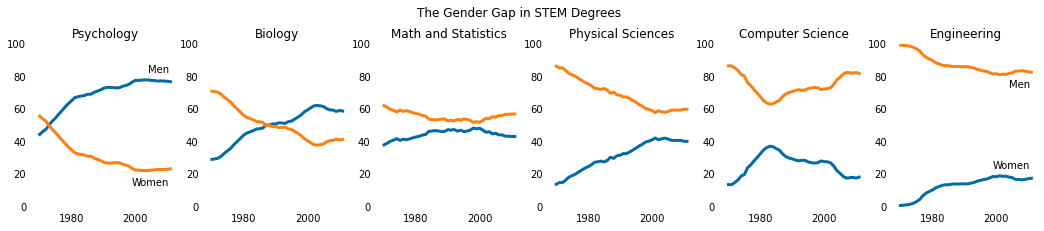

In [3]:
# create figure, set size
fig = plt.figure(figsize=(18, 3))
# set figure title with padding
fig.suptitle('The Gender Gap in STEM Degrees', y=1.05)
# create subplots
for i in range(len(stem_cats)):
    # loop through STEM degrees to create six subplots
    ax = fig.add_subplot(1,6,i+1)
    # create lines for women and men; men's degrees calculated
    # by subtracting percentages of women's degrees from 100
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[i]],
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[i]],
            c=cb_orange, label='Men', linewidth=3)
    # hide spines and ticks
    ax.spines['right'].set_visible(False)    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)    
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # set ranges for x and y axes
    ax.set_xlim(1968, 2013)
    ax.set_ylim(0,100)
    # set titles for each subplot
    ax.set_title(stem_cats[i])
    # add line labels to first and last subplots
    if i == 0:
        ax.text(2004, 82, 'Men')
        ax.text(1999, 13, 'Women')
    elif i == 5:
        ax.text(2004, 73, 'Men')
        ax.text(1999, 23, 'Women')
plt.show()

Next, I'll compare percentages of degrees awarded to men and women across all degree categories.

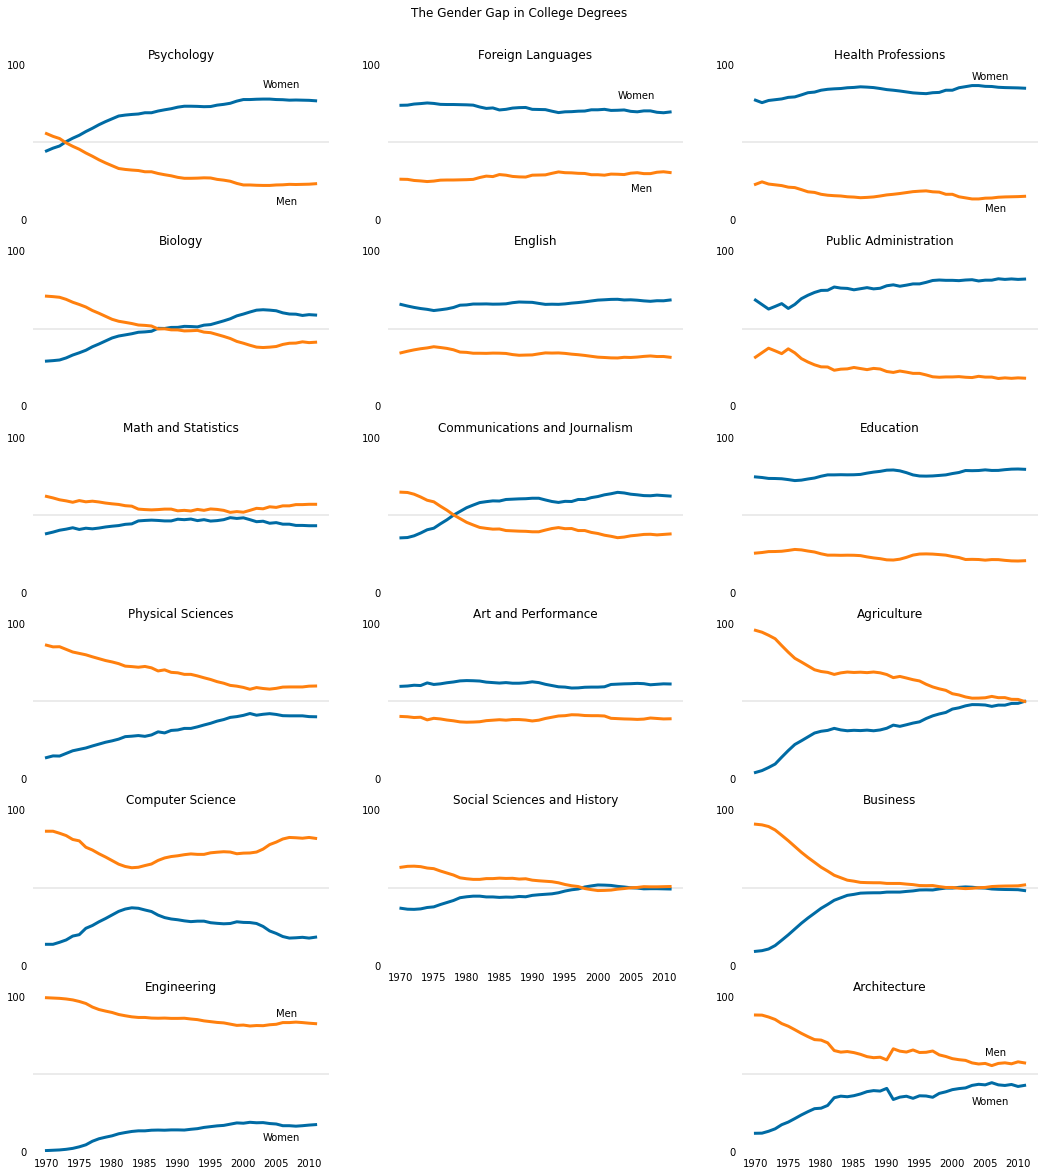

In [4]:
# create fig and subplots, set fig size
fig = plt.figure(figsize=(18, 20))
axes = fig.subplots(nrows=6, ncols=3)
# set overall figure title with padding
fig.suptitle('The Gender Gap in College Degrees', y=0.92)
# delete last subplot in lib arts column, since there are
# only five lib arts degree categories
fig.delaxes(axes[5, 1])
for ax in fig.axes:
    # hide spines, ticks, x-axis labels
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False, top=False, right=False, left=False, labelbottom=False)
    # set ranges for x and y axes
    ax.set_xlim(1968, 2013)
    ax.set_ylim(0,100)
    # set y-ticks to show only 0 and 100
    ax.set_yticks([0,100])
    # draw light grey line at y-axis position 50
    ax.axhline(50, c=cb_grey, alpha=0.3)
# loop through to create STEM charts (first column)
for i in range(len(stem_cats)):
    # create lines for women and men; men's degrees calculated
    # by subtracting percentages of women's degrees from 100
    axes[i, 0].plot(women_degrees['Year'], women_degrees[stem_cats[i]],
            c=cb_dark_blue, label='Women', linewidth=3)
    axes[i, 0].plot(women_degrees['Year'], 100 - women_degrees[stem_cats[i]],
            c=cb_orange, label='Men', linewidth=3)
    # set title based on list index
    axes[i, 0].set_title(stem_cats[i])
    # label lines in top and bottom subplots
    if i == 0:
        axes[i, 0].text(2003, 85, 'Women')
        axes[i, 0].text(2005, 10, 'Men')
    elif i == 5:
        axes[i, 0].text(2005, 87, 'Men')
        axes[i, 0].text(2003, 7, 'Women')
        # add x-axis labels back for bottom subplot
        axes[i, 0].tick_params(labelbottom=True)
# loop through to create lib arts charts (second column)
for i in range(len(lib_arts_cats)):
    # create lines for women and men; men's degrees calculated
    # by subtracting percentages of women's degrees from 100
    axes[i, 1].plot(women_degrees['Year'], women_degrees[lib_arts_cats[i]],
            c=cb_dark_blue, label='Women', linewidth=3)
    axes[i, 1].plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[i]],
            c=cb_orange, label='Men', linewidth=3)
    # set title based on list index
    axes[i, 1].set_title(lib_arts_cats[i])
    # label lines in top subplot
    if i == 0:
        axes[i, 1].text(2003, 78, 'Women')
        axes[i, 1].text(2005, 18, 'Men')
    # add x-axis labels back for bottom subplot
    elif i == 4:
        axes[i, 1].tick_params(labelbottom=True)
# loop through to create other charts (third column)
for i in range(len(other_cats)):
    # create lines for women and men; men's degrees calculated
    # by subtracting percentages of women's degrees from 100
    axes[i, 2].plot(women_degrees['Year'], women_degrees[other_cats[i]],
            c=cb_dark_blue, label='Women', linewidth=3)
    axes[i, 2].plot(women_degrees['Year'], 100 - women_degrees[other_cats[i]],
            c=cb_orange, label='Men', linewidth=3)
    # set title based on list index
    axes[i, 2].set_title(other_cats[i])
    # label lines in top and bottom subplots
    if i == 0:
        axes[i, 2].text(2003, 90, 'Women')
        axes[i, 2].text(2005, 5, 'Men')
    elif i == 5:
        axes[i, 2].text(2005, 62, 'Men')
        axes[i, 2].text(2003, 30, 'Women')
        # add x-axis labels back for bottom subplot
        axes[i, 2].tick_params(labelbottom=True)
# save figure as image file
plt.savefig('gender_degrees.png')

plt.show()